
<a name="T_C9742429"></a>
# <span style="color:rgb(213,80,0)">Analyzing and Visualizing Open Precipitation Web Data</span>

Authors: Kostas Leptokaropoulos and Shubo Chakrabarti


 *Copyright 2024 - 2024 The MathWorks, Inc.*

<a name="beginToc"></a>
## Table of Contents
[Introduction](#H_C62AE357)

[Data and Resources](#H_D15119BD)

[Import Data from the web](#H_2BB98A21)

[Read and filter Geospatial Data](#H_F7C13833)

&emsp;&emsp;[Filter Data in Time and Space](#H_56F0E8E6)

[Import Filtered Data](#H_F71FADAB)

&emsp;[Convert units from sec-1 to day-1](#H_C21E8570)

&emsp;[Calculate dates ](#H_ACBB15B5)

[Select a day to visualize precipitation data](#H_237E3BC0)

[Visualize and compare past and projected data](#H_AF9385B7)

[Some Stats!](#H_49DA171B)

&emsp;[Compare incremental and cumulative precipitation](#H_2B4F87DD)

&emsp;[Generate Daily/Cummulative Plots and Box Charts](#H_F598E26B)

&emsp;[Perform Statistical Tests](#H_A0FA1E1E)

[Publish reusable MATLAB code for reproducible results](#H_2C04E455)

<a name="endToc"></a>
<a name="H_C62AE357"></a>
## Introduction

 **Public Data:** Many public databases have been created for the purposes of making data freely accessible to the scientific community. A best practice is to assign a unique identifier to a dataset, so that it is discoverable. A common form of a unique identifier is a [Digital Object Identifier or DOI](https://en.wikipedia.org/wiki/Digital_object_identifier)® which points to the data.


**Access Public Data:** To access and process public data, you can use several routes.

-  Download data files to your local machine and work with them in MATLAB®.
-  Access data directly via an API. MATLAB's function that [import data from NetCDF files](https://www.mathworks.com/help/matlab/network-common-data-form.html) from RESTful API used by many portals.
-  If the portal offers only Python® bindings, [call Python from MATLAB](https://www.mathworks.com/help/matlab/call-python-libraries.html).

**Data formats:** MATLAB supports a broad range of data formats

-  There is a wide range of scientific data formats that can be [natively read in MATLAB](https://www.mathworks.com/help/matlab/scientific-data.html). They include NetCDF, HDF5 and GRIB as well as more specialized data formats.
-  In addition, the [Mapping Toolbox™](https://uk.mathworks.com/products/mapping.html) contains [built-in functions](https://www.mathworks.com/help/map/file-import-and-export.html) to read data from many online data repositories in standard geo-data formats.
-  Sometimes data import functions may be [written by the Geoscience community](https://uk.mathworks.com/matlabcentral/fileexchange/?category%5B%5D=overview%2Fsciences1689.support%2Fearth-oce840&q=data+read), and published on the MATLAB [File Exchange](https://uk.mathworks.com/matlabcentral/fileexchange/?category%5B%5D=overview%2Fsciences1689.support%2Fearth-oce840) - a portal for community contributions in MATLAB. All community contributions are covered by open source licenses, which means they can be re-used, modified or added to. Exact terms and conditions depend on the licenses used by the author.
<a name="H_D15119BD"></a>
## Data and Resources

In this example, we use data covered by permissive license, (i.e., the [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/deed.en) - CC BY 4.0). It is important for Open Science to have such data since under CC BY 4.0 license you are free to share, copy, redistribute and adapt the material as long as you give appropriate credit, provide a link to the license, and indicate if any changes were made.


We access global climate data from the WCRP CMIP6 (World Climate Research Programme Coupled Intercomparison Project - Phase 6), which are located at: [**https://esgf-data.dkrz.de/search/cmip6-dkrz/**.](https://esgf-data.dkrz.de/search/cmip6-dkrz)


The dataspace is hosted by the [German Climate Computer Center](https://www.dkrz.de/en) (DKRZ) and the [Infrastructure for the European Network for Earth System Modelling](https://is.enes.org/) (IS-ENES), as a part of the global [Earth System Grid Federation](https://esgf.llnl.gov/) (ESGF).


The user can apply multiple filters and preferences for a large variety of climate parameters, such as see ice thickness, air pressure, phytoplankton mass concentation, etc, provided by different sources. In our example we used the ffollowing filtering:

-  CF Standard name: precipitation flux
-  Frequency: day
-  Nominal Resolution: 10km, 25km

Make sure to check the box  <u>*"Show all Replicas*</u>".

<a name="M_93E589FD"></a>

**Example links** for the data:

<a name="M_E891702D"></a>
-  data [Link](http://esgf-data04.diasjp.net/thredds/catalog/esgcet/60/CMIP6.HighResMIP.AS-RCEC.HiRAM-SIT-HR.highresSST-present.r1i1p1f1.day.pr.gn.v20210713.html#CMIP6.HighResMIP.AS-RCEC.HiRAM-SIT-HR.highresSST-present.r1i1p1f1.day.pr.gn.v20210713)  (1950 - 2014); e.g., [data 19500101-19501231](https://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/HighResMIP/AS-RCEC/HiRAM-SIT-HR/highresSST-present/r1i1p1f1/day/pr/gn/v20210713/pr_day_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_19500101-19501231.nc.html)
-  data [Link](https://esgf-data04.diasjp.net/thredds/catalog/esgcet/60/CMIP6.HighResMIP.AS-RCEC.HiRAM-SIT-HR.highresSST-future.r1i1p1f1.day.pr.gn.v20210707.html)  (2015 - 2050); e.g., [data 20450101-20451231](https://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/HighResMIP/AS-RCEC/HiRAM-SIT-HR/highresSST-future/r1i1p1f1/day/pr/gn/v20210707/pr_day_HiRAM-SIT-HR_highresSST-future_r1i1p1f1_gn_20450101-20451231.nc.html)

<samp><u>Data Acknowledgement Statement</u></samp> <samp>(see</samp> [*<samp>CMIP6 terms of use</samp>*](https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-2.html)<samp>):</samp>


 <samp>“We acknowledge the World Climate Research Programme, which, through its Working Group on Coupled Modelling, coordinated and promoted CMIP6. We thank the climate modeling groups for producing and making available their model output, the Earth System Grid Federation (ESGF) for archiving the data and providing access, and the multiple funding agencies who support CMIP6 and ESGF. We used the CMIP6 model data produced by the Research Center for Environmental Changes, Academia Sinica, Taiwan (AS-RCEC), which is licensed under a Creative Commons Attribution 4.0 International License (CC BY 4.0;</samp> [<samp>https://creativecommons.org/licenses/</samp>](https://creativecommons.org/licenses/) <samp>).</samp>


<samp>Further information about this data can be found via the further_info_url (recorded as a "Global Attributes: License" in these .nc files). The data producers and data providers make no warranty, either express or implied, including, but not limited to, warranties of merchantability and fitness for a particular purpose. All liabilities arising from the supply of the information (including any liability arising in negligence) are excluded to the fullest extent permitted by law.”</samp>

<a name="H_2BB98A21"></a>
## Import Data from the web

In [1]:
clearvars; clc; close all


You can read any 2 datasets from the [example links](#M_E891702D) indicated above, one imported as "URLpast" and a subsequent one as "URLproj".


There are a bunch of [functions that you can use to interact with NetCDF files](https://uk.mathworks.com/help/matlab/network-common-data-form.html).


In [2]:
% read NETCDF data from the web
  URLpast = "https://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/HighResMIP/AS-RCEC/HiRAM-SIT-HR/highresSST-present/r1i1p1f1/day/pr/gn/v20210713/pr_day_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_19530101-19531231.nc";
  URLproj = "https://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/HighResMIP/AS-RCEC/HiRAM-SIT-HR/highresSST-future/r1i1p1f1/day/pr/gn/v20210707/pr_day_HiRAM-SIT-HR_highresSST-future_r1i1p1f1_gn_20450101-20451231.nc";



Read the precipitation flux as "Variable"


In [3]:
ncdisp(URLpast)
ncdisp(URLproj)
Variable = "pr";

<a name="H_F7C13833"></a>
## Read and filter Geospatial Data

read londitude and latitude from the .nc file


In [4]:
lon = double(ncread(URLpast,'lon'));
lat = double(ncread(URLpast,'lat'));

<a name="H_56F0E8E6"></a>
#### Filter Data in Time and Space

Select boundaries of a rectangual area


In [5]:
%minimum and maximum longitude
minlon = 25;maxlon = 40; % set values from 0 to 360
%minimum and maximum latitude
minlat = 35;maxlat = 50; % set values from -90 to 90


Select first day and number of days after the first *(their sum must not exceed 365)*


In [6]:
starttime = 100;counttime = 190;% set values from 1 to 365


Find the indexes of longitude and latitude that correspond to the selected geographical boundaries


In [7]:
indlon = find(lon>=minlon & lon<=maxlon);
indlat = find(lat>=minlat & lat<=maxlat);

startlon=indlon(1);countlon=numel(indlon);
startlat=indlat(1);countlat=numel(indlat);

<a name="H_F71FADAB"></a>
## Import Filtered Data

Import longitude, latitude, time and precipitation values for past and future data, as constrained in the [previous section](#H_56F0E8E6).


In [8]:
lat = double(ncread(URLpast,'lat',startlat,countlat));
lon = double(ncread(URLpast,'lon',startlon,countlon));
tpast = double(ncread(URLpast,'time',starttime,counttime));
tproj = double(ncread(URLproj,'time',starttime,counttime));
Varpast = double(ncread(URLpast,Variable,[startlon startlat starttime],[countlon countlat counttime]));
Varproj = double(ncread(URLproj,Variable,[startlon startlat starttime],[countlon countlat counttime]));


read the precipitation unit from the .nc file


In [9]:
unit = ncreadatt(URLpast,'pr','original_units');

<a name="H_C21E8570"></a>
### Convert units from sec-1 to day-1

In [10]:
 Varpast = Varpast*86400;
 Varproj = Varproj*86400;
 newunit = "kg m^-^2 day^-^1"

<a name="H_ACBB15B5"></a>
### Calculate dates

calculate date vectors, as days passed since the reference date in the .nc file


In [11]:
Tpast = datetime('1948-1-1')+tpast,Tproj = datetime('1948-1-1')+tproj
Tpast.Format = 'dd-MMM-uuuu';Tproj.Format = 'dd-MMM-uuuu';
Tpast_str = string(Tpast);
Tproj_str = string(Tproj);


<a name="H_237E3BC0"></a>
## Select a day to visualize precipitation data

In [12]:
close all


Select a day


In [13]:

t1 = Tpast_str(6);inx = Tpast_str == t1;


Create a grid with precipitation values


In [14]:
[lat1,lon1] = meshgrid(lat,lon);
Var1past = Varpast(:,:,inx);
Var1proj = Varproj(:,:,inx);
mV = min([min(Var1past(:)),min(Var1proj(:))])
MV = max([max(Var1past(:)),max(Var1proj(:))])



Customize colormap limits to the selected data


In [15]:

  CBmin = -9.00419266706534e-16;
  CBmax = 51.43537279218435;

<a name="H_AF9385B7"></a>
## Visualize and compare past and projected data

Greate a 2 frame figure. Plot the past data in the left frame and the projected data in the right frame. Add the coastlines in both figures. The text displayed in the figure (title, colorbar) is also directly imported from the .nc file metadata and the parameter values we have set.


In [16]:
tiledlayout(1,2)
nexttile % past
worldmap([minlat maxlat],[minlon maxlon])
geoshow(lat1,lon1,Var1past,'DisplayType','texturemap','FaceAlpha',0.5);
geoshow('landareas.shp','EdgeColor','black','FaceColor','none')
title([ncreadatt(URLpast,Variable,'long_name'),'on',t1])
  clim([CBmin CBmax])

nexttile %projection
worldmap([minlat maxlat],[minlon maxlon])
geoshow(lat1,lon1,Var1proj,'DisplayType','texturemap','FaceAlpha',0.5);
geoshow('landareas.shp','EdgeColor','black','FaceColor','none')
 cb = colorbar; % display colorbar
 cb.Location='eastoutside';
 cb.Label.String = (newunit);
title([ncreadatt(URLproj,Variable,'long_name'),'on',Tproj_str(inx)])
  clim([CBmin CBmax])

 colormap turbo


<a name="H_49DA171B"></a>
## Some Stats!

In this section a comparison is perfomed between the past and projected data.

-  First, the precipitation time series (daily, solid lines; cummulative, dashed lines) are plotted in the same plot for direct comparison.
-  Then, [box charts](https://uk.mathworks.com/help/matlab/ref/boxchart.html) are generated to show the daily sum average precipitation values distribution (including the outliers)
-  Finally, 3 Hypothesis Tests are performed to evaluate the statistical significance of the results from the comparison of the past and projected precipitation:

 a) The [Wilcoxon rank sum test](https://uk.mathworks.com/help/stats/ranksum.html): Tests the null hypothesis that past and projected data are samples from continuous distributions with equal medians, against the alternative that they are not.


b) The [2 sample t-test](https://uk.mathworks.com/help/stats/ttest2.html): Tests the null hypothesis that past and projected data come from independent random samples from normal distributions with equal means and equal but unknown variances. The alternative hypothesis is that the past and projected data comes from populations with unequal means.


c) The 2 sample [Kolmogorov - Smirnov test](https://uk.mathworks.com/help/stats/kstest2.html): Tests the null hypothesis that that past and projected data are from the same continuous distribution against the alternative hypothesis that they are from different continuous distributions.

<a name="H_2B4F87DD"></a>
### Compare incremental and cumulative precipitation

In [17]:
N = numel(tpast)


Select number of days (between 1 and N)


In [18]:
T1 = Tpast_str(1);inx1 = Tpast_str == T1;n1 = find(inx1);
T2 = Tpast_str(190);inx2 = Tpast_str == T2;n2 = find(inx2);
n = n2 - n1 +1;
if n2<=n1;error('End date (n2) should be greater than start date (n1)');end


<a name="H_F598E26B"></a>
### Generate Daily/Cummulative Plots and Box Charts

In [19]:
Boxp1 = zeros(size(n,1));Boxp2 = zeros(size(n,1));cou=1;
for i=n1:n2
Boxp1(cou) = sum(Varpast(:,:,i),"all");
Boxp2(cou) = sum(Varproj(:,:,i),"all");
cou=cou+1;
end



 Daily and Cummulative plots


In [20]:
figure
plot(Tpast(n1:n2),Boxp1,'r-',Tpast(n1:n2),Boxp2,'k-',LineWidth=1);datetick('x',6);ylabel('daily sum');xlabel('date');
hold on
yyaxis right;plot(Tpast(n1:n2),cumsum(Boxp1),'r--',Tpast(n1:n2),cumsum(Boxp2),'k--');datetick('x',6);ylabel('cummulative');xlabel('date');
legend(num2str(year(Tpast(1))),num2str(year(Tproj(1))),num2str(year(Tpast(1))),num2str(year(Tproj(1))))



Box charts


In [21]:
figure
group = categorical([repmat("past", size(Boxp1));repmat("projection", size(Boxp2))]);
boxchart([Boxp1',Boxp2']);xticklabels({'past','projection'});
title(["Daily Sum Average","past/projection ratio = "+num2str(sum(Boxp1)/sum(Boxp2),'%7.1f')])


<a name="H_A0FA1E1E"></a>
### Perform Statistical Tests

In [22]:
[p.Wilcoxon,h.Wilcoxon] = ranksum(Boxp1,Boxp2); % null hypothesis, h0, equal medians
[h.ttest2,p.ttest2] = ttest2(Boxp1,Boxp2); % null hypothesis, h0, equal means
[h.kstest2,p.kstest2] = kstest2(Boxp1,Boxp2); % null hypothesis, h0, samples come from the same distribution
h.ttest2 = logical(h.ttest2);

if h.Wilcoxon==0;disp(['>> The <strong>Wilcoxon</strong> rank sum test FAILS to reject the hypothesis of equal medians at ' ,num2str(p.Wilcoxon) ' significance'])
else; disp(['>> The <strong>Wilcoxon</strong> rank sum test REJECTS the hypothesis of equal medians at ',num2str(p.Wilcoxon), ' significance'])
end

if h.ttest2==0;disp(['>> The 2-sample <strong>t-test</strong> FAILS to reject the hypothesis of equal means at ' ,num2str(p.ttest2) ' significance'])
else; disp(['>> The 2-sample <strong>t-test</strong> REJECTS the hypothesis of equal means at ',num2str(p.ttest2), ' significance'])
end

if h.kstest2==0;disp(['>> The 2-sample <strong>Kolmogorov-Smirnov</strong> test FAILS to reject the hypothesis that the two samples come from the same distribution at ' ,num2str(p.kstest2) ' significance'])
else; disp(['>> The 2-sample <strong>Kolmogorov-Smirnov</strong> test REJECTS the hypothesis that the two samples come from the same distribution at ',num2str(p.kstest2), ' significance'])
end

<a name="H_2C04E455"></a>
## Publish reusable MATLAB code for reproducible results
<a name="H_8025316E"></a>

To enable collaboration partners, reviewers and the community reuse your MATLAB code and reproduce your results.

-  Publish your MATLAB code (eg: on GitHub) and generate a [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier) (digital object identifier) by [linking it to a DOI generating portal](https://docs.github.com/en/repositories/archiving-a-github-repository/referencing-and-citing-content) (egs. [Figshare](https://help.figshare.com/article/how-to-connect-figshare-with-your-github-account#:~:text=You%20can%20get%20set%20up,where%20you'll%20authorise%20figshare.)®, [Zenodo](https://docs.github.com/en/repositories/archiving-a-github-repository/referencing-and-citing-content)®). Make your research output findable by including as much information as needed in the metadata. Document your code well explaining steps required to reproduce clearly and explicitly.
-  Make sure you include a license for your code that specifies reuse and re-distribution rights for the code. Various open source licenses are [available](https://opensource.org/licenses/). BSD, MIT and Apache licenses are commonly used for open research software.
-  [Link your GitHub repository to File Exchange](https://www.mathworks.com/matlabcentral/content/fx/about.html?s_tid=gn_mlc_fx_help#Why_GitHub) to make your MATLAB code available to MATLAB users via the Add-Ons button.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 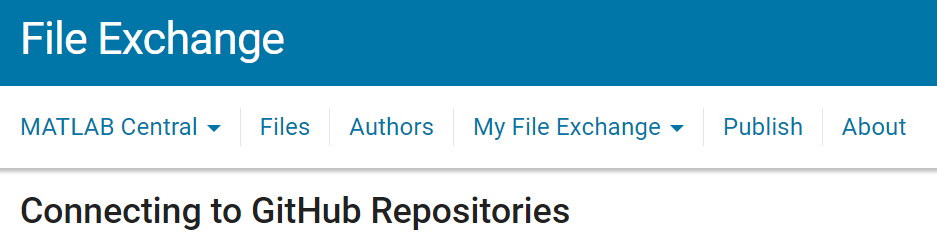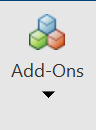

-  Make your MATLAB code **interoperable**. MATLAB is [interoperable](https://www.mathworks.com/products/matlab/matlab-and-other-programming-languages.html) with several other languages including C, Fortran and Python. MATLAB can be directly called from Python using the [MATLAB Engine for Python](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html)® which is available as a PyPI® package and can be installed using the command <samp>pip install matlab.engine</samp> from Python. MATLAB code can also be [packaged as a Python library](https://www.mathworks.com/help/compiler_sdk/gs/create-a-python-application-with-matlab-code.html) and called from Python. Deep Learning models from other frameworks are [interoperable with MATLAB](https://www.mathworks.com/help/deeplearning/ug/interoperability-between-deep-learning-toolbox-tensorflow-pytorch-and-onnx.html) either using the [ONNX™ interface](https://www.mathworks.com/matlabcentral/fileexchange/67296-deep-learning-toolbox-converter-for-onnx-model-format) or via direct interfaces that exist, for example, for Pytorch® and Tensorflow™ models.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 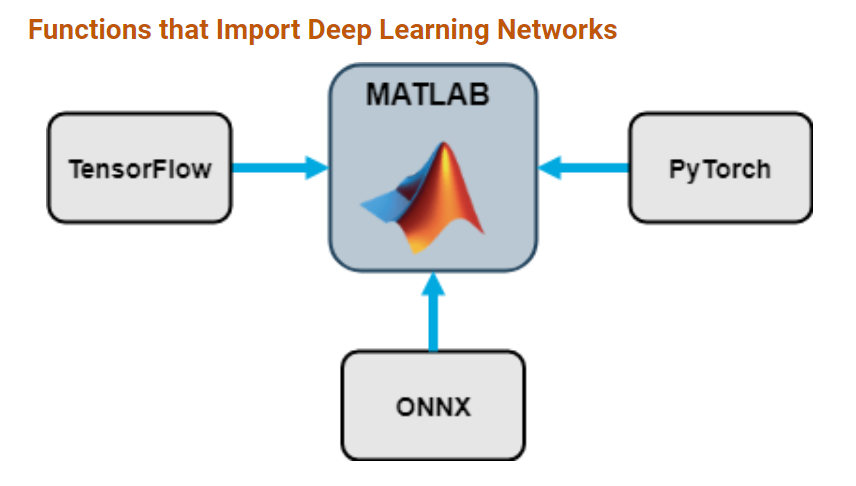

-  MATLAB is interoperable with cloud architectures such as [JupyterHub](https://www.mathworks.com/products/reference-architectures/jupyter.html)® and MATLAB code can also be used within Jupyter Notebooks. Here is a link to a Jupyter® notebook of the same example used here. There is an official MATLAB kernel for Jupyter Notebooks - read about it [here](https://blogs.mathworks.com/matlab/2023/01/30/official-mathworks-matlab-kernel-for-jupyter-released/).  **To easily convert a Live Script into a Jupyter® notebook use the** [**<samp>export</samp>**](https://uk.mathworks.com/help/matlab/ref/export.html) **function** .

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 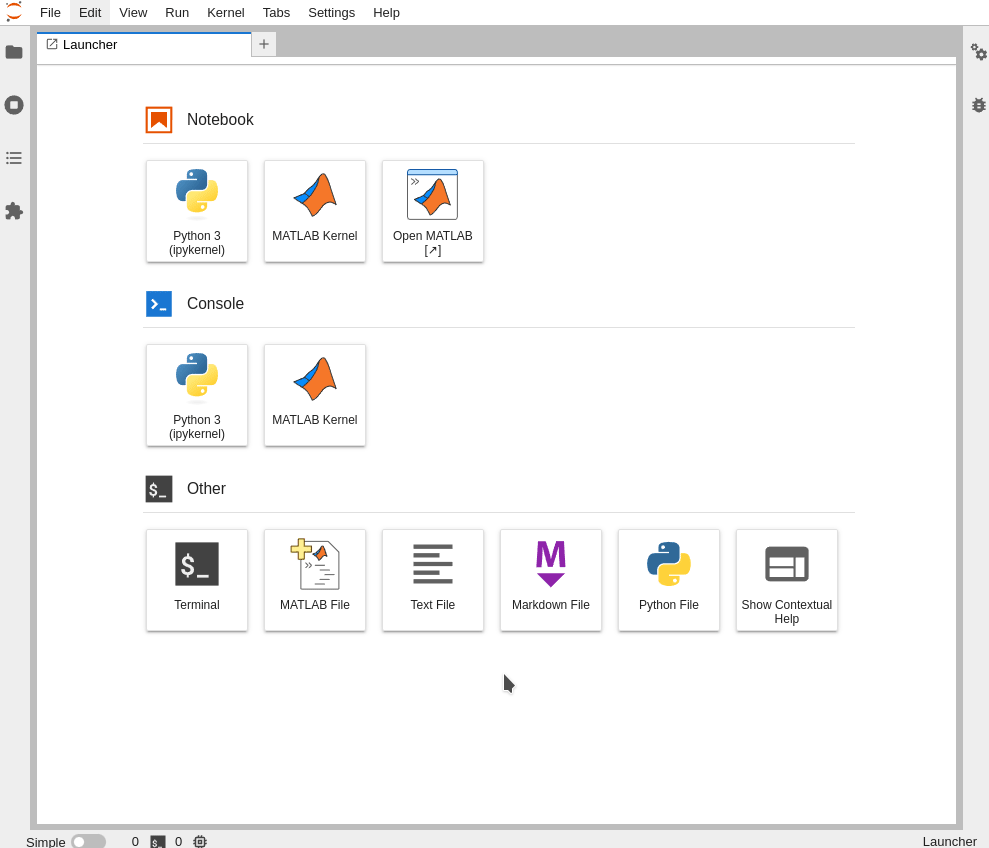

-  Run your [MATLAB code on the browser directly from GitHub](https://www.mathworks.com/help/matlab/matlab_env/open-github-repositories-in-matlab-online.html). Copy and paste the GitHub repo address into [this app](https://www.mathworks.com/products/matlab-online/git.html). That will generate a command, which when pasted into your README, will create a "Open in MATLAB Online™" button on your GitHub repository. By clicking on this button, users will be able to run your code in the browser on MATLAB Online.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 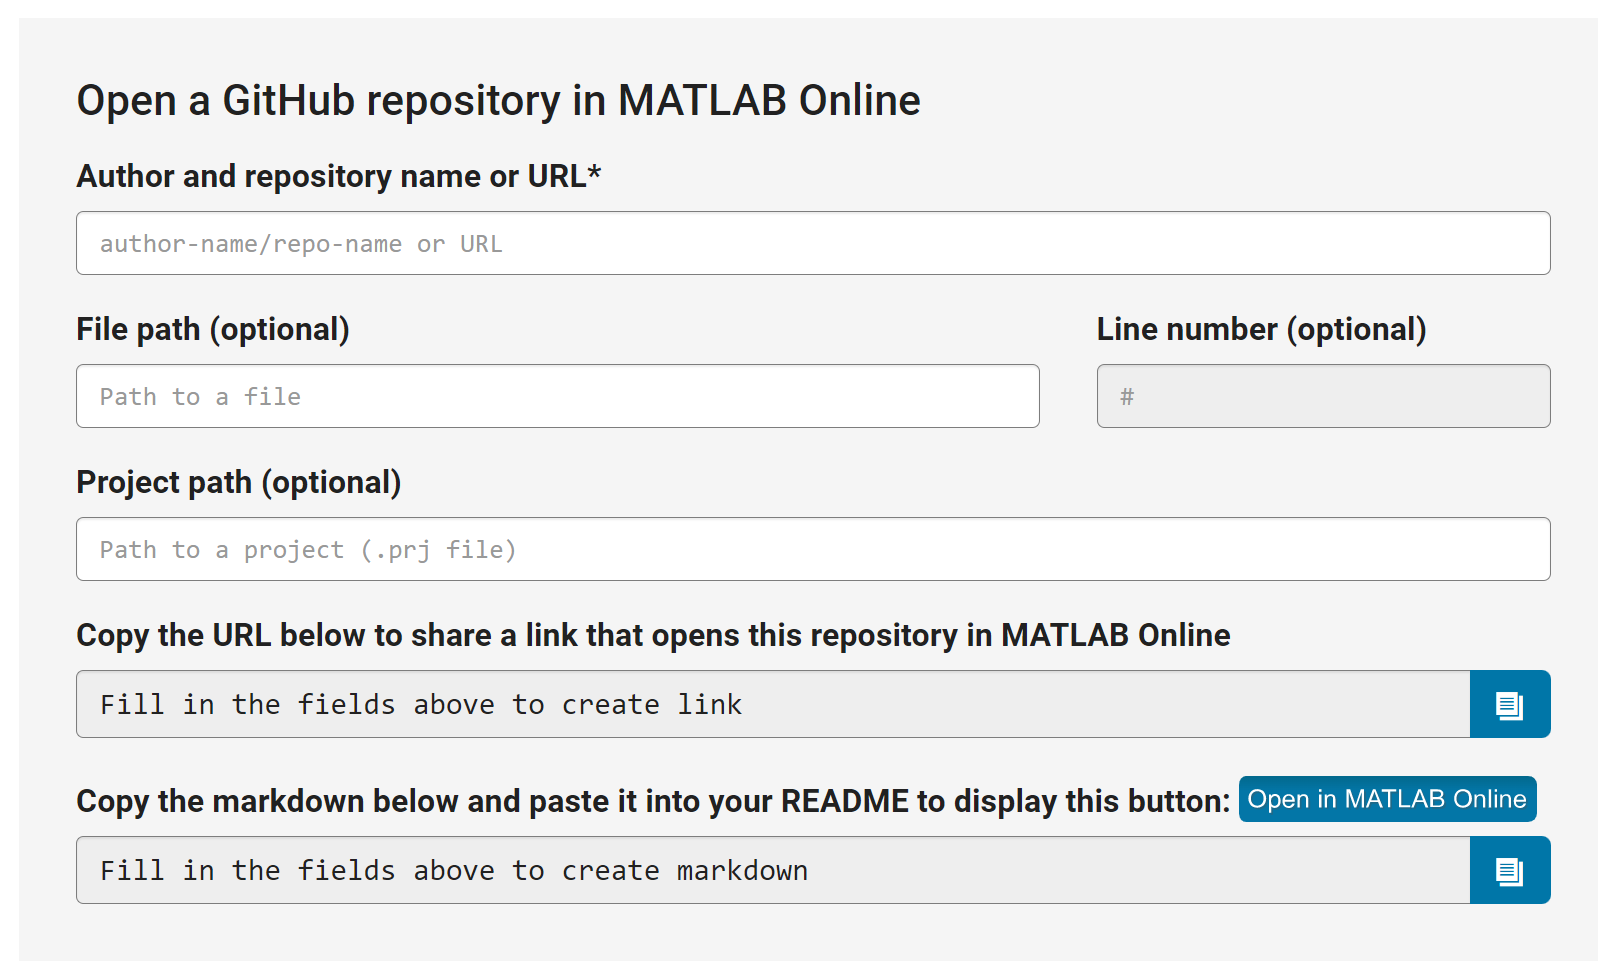

-  Make your MATLAB code reproducible by using a reproducibility portals that supports MATLAB. One example is Code Ocean®. On Code Ocean, you can [upload your MATLAB code](https://help.codeocean.com/en/articles/1120384-which-toolboxes-are-included-with-matlab) including dependencies. Once uploaded, your code is tested and published as a Code Ocean "capsule" which can be run online or downloaded and run locally by users. Code Ocean also generates a DOI for your code capsule.  For Live Scripts, convert the <samp>.mlx</samp> file into e.g., a <samp>.m</samp> file, a <samp>.html</samp> or a.ipynb file using the [<samp>export</samp>](https://de.mathworks.com/help/matlab/ref/export.html) function for best results. Here is the DOI for the Code Ocean capsule of the this code. Read more about MATLAB on Code Ocean [here](https://blogs.mathworks.com/loren/2021/07/15/sharing-and-running-matlab-code-in-the-cloud/#H_795BB86B).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 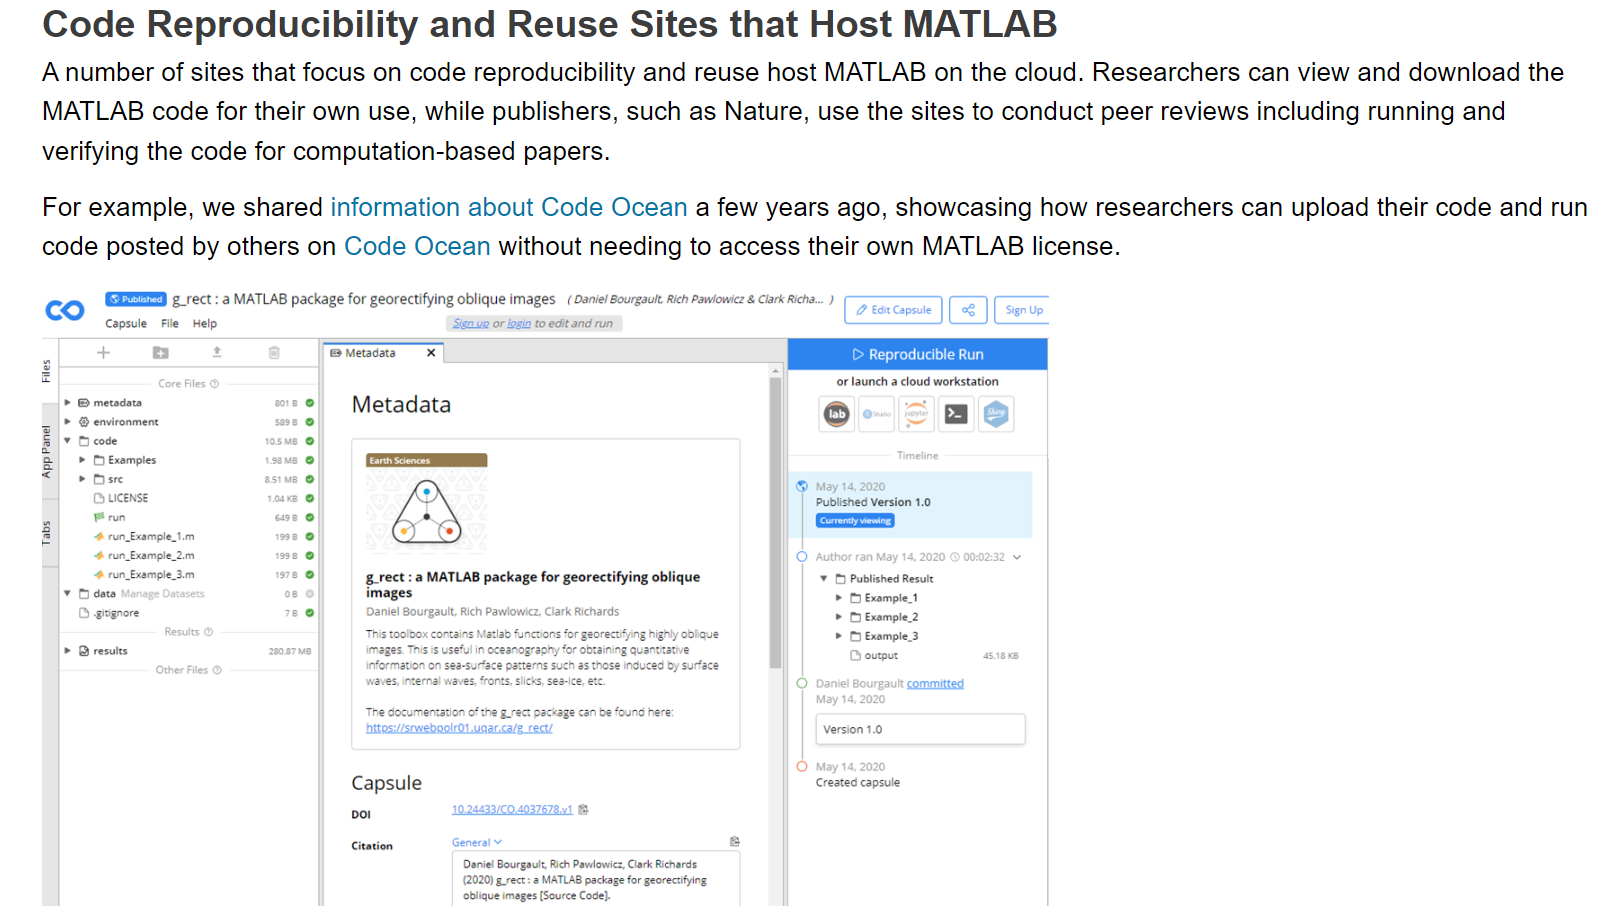

-  **Warning**: Before making your code available on the cloud, <u>make sure all dependencies including any data that is needed for your code to run is uploaded along with the code</u>. Also make sure any <u>path and/or filenames that refer to local directories are appropriately renamed</u>.
-  FAIR standards: FAIR is an acronym that stands for **F**indable, **A**ccessible, **I**nteroperable and **R**eproducible. It is an [accepted standard](https://www.nature.com/articles/s41597-022-01710-x) for research output (code, data) and is often required for your research results to be in [compliance with "Open Science" standards](https://research-and-innovation.ec.europa.eu/strategy/strategy-2020-2024/our-digital-future/open-science_en). Adhering to the above pointers helps in making your MATLAB code FAIR
<a name="H_D276B8C3"></a>

*Copyright 2024 - 2024 The MathWorks, Inc.*

